In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, math

# from myPerspective import perspective_if_only_one_card

In [2]:
def perspective_if_only_one_card_img(image):

    ## contour를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contour, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour를 바탕으로 사각형의 좌표를 찾는 작업
    rect = cv2.minAreaRect(contour[0])
    box = cv2.boxPoints(rect)
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    
    # If card is horizontally oriented
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp

    # If card is vertically oriented
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [38]:
def perspective2(image):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
#         img2 = cv2.drawContours(img, [box], -1, (0, 0, 255), 5)
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [39]:
data_loc = '../big_au/sample1/'
decklist = os.listdir(data_loc)
cardlist=[]
for i in os.listdir(data_loc):
    cardlist.append(i)
#     print(i)
imglist = []
authentic = []
imposter = []
for i in cardlist:
#     print(i)
#     perspective_if_only_one_card(data_loc+i+'.jpg')
    
    tmpimg = cv2.imread(data_loc+i)
#     tmpimg = cv2.resize(tmpimg, (96, 128), interpolation=cv2.INTER_AREA)
    imglist.append(tmpimg)
imglist = np.array(imglist)

In [40]:
cardlist=[]
for i in os.listdir('../dataset/'+'card_deck1'):
    cardlist.append(i[:-4])
print(np.array(cardlist))

['C10' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CA' 'CJ' 'CK' 'CQ' 'D10'
 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'DA' 'DJ' 'DK' 'DQ' 'H10' 'H2'
 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'HA' 'HJ' 'HK' 'HQ' 'S10' 'S2' 'S3'
 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'SA' 'SJ' 'SK' 'SQ']


In [41]:
cards = []
for i in os.listdir('../dataset/card_deck1'):
#     print(i)
    cards.append(cv2.imread('../dataset/card_deck1/'+i, cv2.IMREAD_GRAYSCALE))
cards = np.array(cards)

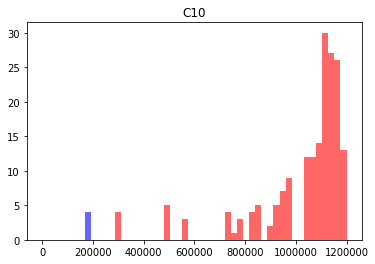

In [9]:
authentic = []
imposter = []
for i in range(len(imglist)):
    warp, _ =perspective_if_only_one_card_img(imglist[i])
    diff_img = cv2.absdiff(cards[0],warp)
    if i > 3: 
        authentic.append(diff_img.sum())
    else: 
        imposter.append(diff_img.sum())
authentic = np.array(authentic)
imposter = np.array(imposter)
plt.hist(authentic, range=[0,1200000],  color = 'r',  bins=50, alpha = 0.6)
plt.hist(imposter, range=[0,1200000],  color = 'b',  bins=50, alpha = 0.6)
plt.title('C10')
plt.show()

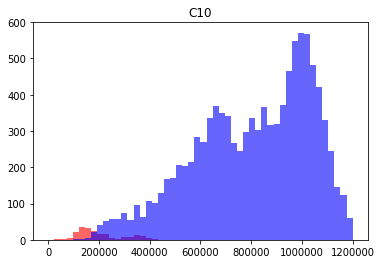

In [45]:
correct = 0
wrong = 0
authentic = []
imposter = []
for card in range(len(cards)):
    for i in range(len(imglist)):
        warp, _ =perspective2(imglist[i])
        diff_img = cv2.absdiff(cards[card], warp)
        if card == int(i/4):
#             print(card, i)
            if diff_img.sum()>200000:
#                 print(cardlist[card], cardlist[int(i/4)])
                wrong+=1
            
            authentic.append(diff_img.sum())
        else: 
            imposter.append(diff_img.sum())
            if diff_img.sum()<200000:
#                 print(card, i)b
#                 print(cardlist[card], cardlist[int(i/4)])
                wrong+=1
authentic = np.array(authentic)
imposter = np.array(imposter)
plt.hist(authentic, range=[0,1200000],  color = 'r',  bins=50, alpha = 0.6)
plt.hist(imposter, range=[0,1200000],  color = 'b',  bins=50, alpha = 0.6)
plt.title('C10')
plt.show()

In [46]:
wrong/(52*208)

0.011464497041420118

In [47]:
print(wrong)

124


In [28]:
imglist.shape

(208, 170, 150, 3)

In [30]:
82/(52*208)

0.007581360946745562

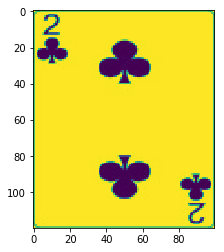

In [22]:
plt.imshow(cards[1])

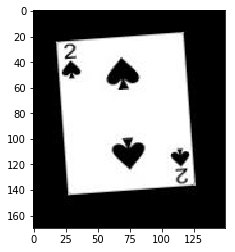

In [25]:
plt.imshow(imglist[160])

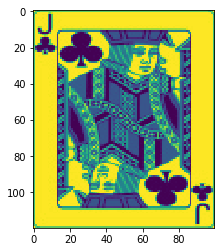

In [16]:
plt.imshow(cards[10])

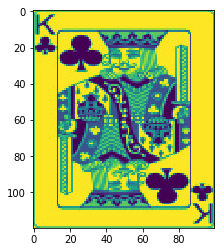

In [17]:
plt.imshow(cards[11])

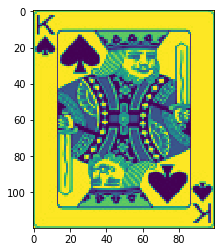

In [18]:
plt.imshow(cards[50])

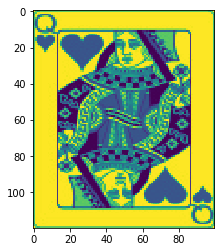

In [19]:
plt.imshow(cards[38])

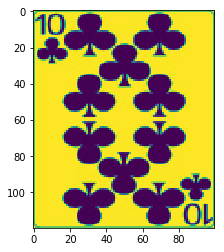

In [20]:
plt.imshow(cards[0])

In [ ]:
tmp=0
for file in os.listdir('../big_au/resample2'):
    if tmp/2 ==1:
#         옮김
    tmp+=1